# EDA on Magic Bricks dataset

## Importing Libraries

In [232]:
import pandas as pd
import matplotlib as mat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install missingno
import missingno as msno

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

!pip install -U textblob
from textblob import TextBlob as tb

In [102]:
df = pd.read_csv('D:\Digikull Projects\Project 2\Xl\mb_cleaned_60%.csv', sep=",", encoding='cp1252', )

In [103]:
df

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
0,P_1,ARS Real Estete,52 Lac,3,New Property,NaN,NaN,Unfurnished,NaN,Farm Side Apartments,2.0,NaN,Ready to Move,NaN,7000.0,NaN,"Farm Side Apartments, Chhattarpur , New Delhi",https://www.magicbricks.com/farm-side-apartmen...,1200,"4,333 per sqft",Farm Side Apartments are Luxury Builder Floors...
1,P_2,Aakash Sharma Sharma,65 Lac,3,New Property,NaN,NaN,Semi-Furnished,NaN,Buildwick Corner Homes,NaN,1.0,Under Construction,NaN,7000.0,NaN,"Buildwick Corner Homes, Chhattarpur , New Delhi",https://www.magicbricks.com/buildwick-corner-h...,1400,"4,643 per sqft",Build Wick Realty provides you Luxury Builder ...
2,P_3,Aakash Sharma Sharma 1,7 Cr,4,New Property,2,NaN,Semi-Furnished,NaN,Premium Builder Floors,5.0,NaN,Ready to Move,House True Real Estate Agents,NaN,NaN,"Premium Builder Floors, Defence Colony , New ...",https://www.magicbricks.com/premium-builder-fl...,2100,"33,333 per sqft",It is A Beautiful Builder Floor Apartment with...
3,P_4,Aakash Sharma Sharma 2,3.50 Cr,3,New Property,NaN,NaN,Semi-Furnished,NaN,Luxury Builder Floor,NaN,2.0,Ready to Move,Findahouse.In,NaN,NaN,"Luxury Builder Floor, Greater Kailash 2 , New...",https://www.magicbricks.com/luxury-builder-flo...,1800,"19,444 per sqft",Luxury Builder Floor located in the heart of G...
4,P_5,Aggarwal Real Estate,25 Lac,2,Resale,NaN,East,Semi-Furnished,NaN,NaN,2.0,NaN,Ready to Move,NaN,11500.0,NaN,New Delhi,NaN,530,"4,545 per sqft",2BHK Ready To Move Well Maintained All Facilit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,P_1539,NaN,85 Lac,2,Resale,3,East,Semi-Furnished,Freehold,NaN,2.0,1.0,Ready to Move,NaN,NaN,Sandeep Bhalla,GH 14 Paschim Vihar,NaN,900,"8,252 per sqft",Golden opportunity of owning this immaculately...
1539,P_1540,NaN,37 Lac,3,Resale,2,North - East,Unfurnished,Freehold,NaN,2.0,1.0,Ready to Move,NaN,NaN,Anil G,"Uttam Nagar Block C, Uttam Nagar",NaN,860,"4,022 per sqft",The key to a brighter future Thats what this a...
1540,P_1541,NaN,80 Lac,3,Resale,2,NaN,Furnished,NaN,DDA Lig Flats,NaN,NaN,Ready to Move,NaN,NaN,Vineet Arora,"DDA Lig Flats, Paschim Vihar",https://www.magicbricks.com/dda-lig-flats-pasc...,1600,"5,000 per sqft",Multistorey apartment is available for sale. I...
1541,P_1542,NaN,55 Lac,3,Resale,1,East,Unfurnished,Freehold,Uttam Nagar Floors,2.0,1.0,Ready to Move,NaN,NaN,Deepak,"Uttam Nagar Floors, Om Vihar, Nawada",https://www.magicbricks.com/uttam-nagar-floors...,94,"5,820 per sqft",Thoughtfully designed and well-architected com...


In [104]:
df.shape

(1543, 21)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   P_ID                1542 non-null   object 
 1   Property_name       815 non-null    object 
 2   Price               1542 non-null   object 
 3   BHK                 1542 non-null   object 
 4   Transaction_type    1539 non-null   object 
 5   Floor               1474 non-null   object 
 6   Facing_Direction    1295 non-null   object 
 7   Furnishing          1536 non-null   object 
 8   Ownership           1193 non-null   object 
 9   Society_name        528 non-null    object 
 10  Bathrooms           1467 non-null   float64
 11  Car_Parking         840 non-null    float64
 12  Status              1532 non-null   object 
 13  Agent_name          549 non-null    object 
 14  Buyers_from_agents  347 non-null    float64
 15  Owner_name          564 non-null    object 
 16  Addres

In [106]:
df.describe()

,Bathrooms,Car_Parking,Buyers_from_agents
count,1467.000000,840.000000,347.000000
mean,2.631902,1.419048,2239.193084
std,1.004501,0.971891,3761.128756
min,1.000000,1.000000,100.000000
25%,2.000000,1.000000,500.000000
50%,2.000000,1.000000,1000.000000
75%,3.000000,2.000000,3000.000000
max,9.000000,20.000000,38500.000000


## Finding Missing values:

In [107]:
df.isnull().sum()

P_ID                     1
Property_name          728
Price                    1
BHK                      1
Transaction_type         4
Floor                   69
Facing_Direction       248
Furnishing               7
Ownership              350
Society_name          1015
Bathrooms               76
Car_Parking            703
Status                  11
Agent_name             994
Buyers_from_agents    1196
Owner_name             979
Address                  1
Product_link          1015
Area_in_sqr_feet         1
Price_per_sqr_feet      52
Reviews                126
dtype: int64

<AxesSubplot:>

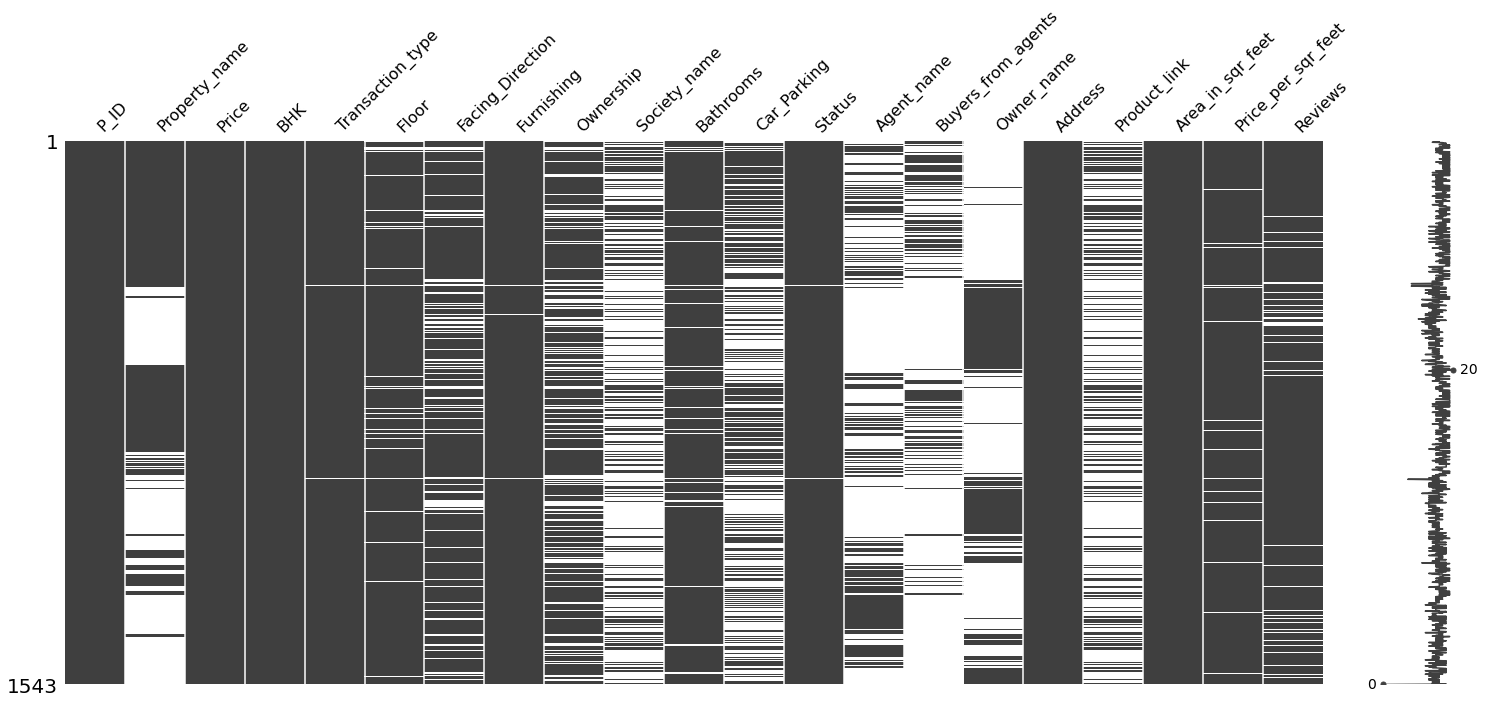

In [108]:
msno.matrix(df)

## Filling Missing values:

In [109]:
df1 = df.copy(deep = True)

In [110]:
df1.dropna(axis = 0, how = 'all', inplace = True)

In [111]:
df1['Property_name'].fillna('Private property', inplace = True)

In [112]:
df1

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
0,P_1,ARS Real Estete,52 Lac,3,New Property,NaN,NaN,Unfurnished,NaN,Farm Side Apartments,2.0,NaN,Ready to Move,NaN,7000.0,NaN,"Farm Side Apartments, Chhattarpur , New Delhi",https://www.magicbricks.com/farm-side-apartmen...,1200,"4,333 per sqft",Farm Side Apartments are Luxury Builder Floors...
1,P_2,Aakash Sharma Sharma,65 Lac,3,New Property,NaN,NaN,Semi-Furnished,NaN,Buildwick Corner Homes,NaN,1.0,Under Construction,NaN,7000.0,NaN,"Buildwick Corner Homes, Chhattarpur , New Delhi",https://www.magicbricks.com/buildwick-corner-h...,1400,"4,643 per sqft",Build Wick Realty provides you Luxury Builder ...
2,P_3,Aakash Sharma Sharma 1,7 Cr,4,New Property,2,NaN,Semi-Furnished,NaN,Premium Builder Floors,5.0,NaN,Ready to Move,House True Real Estate Agents,NaN,NaN,"Premium Builder Floors, Defence Colony , New ...",https://www.magicbricks.com/premium-builder-fl...,2100,"33,333 per sqft",It is A Beautiful Builder Floor Apartment with...
3,P_4,Aakash Sharma Sharma 2,3.50 Cr,3,New Property,NaN,NaN,Semi-Furnished,NaN,Luxury Builder Floor,NaN,2.0,Ready to Move,Findahouse.In,NaN,NaN,"Luxury Builder Floor, Greater Kailash 2 , New...",https://www.magicbricks.com/luxury-builder-flo...,1800,"19,444 per sqft",Luxury Builder Floor located in the heart of G...
4,P_5,Aggarwal Real Estate,25 Lac,2,Resale,NaN,East,Semi-Furnished,NaN,NaN,2.0,NaN,Ready to Move,NaN,11500.0,NaN,New Delhi,NaN,530,"4,545 per sqft",2BHK Ready To Move Well Maintained All Facilit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,P_1538,Private property,1.05 Cr,2,Resale,1,South,Semi-Furnished,Freehold,NaN,2.0,NaN,Ready to Move,NaN,NaN,Anand Kumar,Janakpuri,NaN,720,"12,963 per sqft",NaN
1538,P_1539,Private property,85 Lac,2,Resale,3,East,Semi-Furnished,Freehold,NaN,2.0,1.0,Ready to Move,NaN,NaN,Sandeep Bhalla,GH 14 Paschim Vihar,NaN,900,"8,252 per sqft",Golden opportunity of owning this immaculately...
1539,P_1540,Private property,37 Lac,3,Resale,2,North - East,Unfurnished,Freehold,NaN,2.0,1.0,Ready to Move,NaN,NaN,Anil G,"Uttam Nagar Block C, Uttam Nagar",NaN,860,"4,022 per sqft",The key to a brighter future Thats what this a...
1540,P_1541,Private property,80 Lac,3,Resale,2,NaN,Furnished,NaN,DDA Lig Flats,NaN,NaN,Ready to Move,NaN,NaN,Vineet Arora,"DDA Lig Flats, Paschim Vihar",https://www.magicbricks.com/dda-lig-flats-pasc...,1600,"5,000 per sqft",Multistorey apartment is available for sale. I...


In [113]:
df1.isnull().sum()

P_ID                     0
Property_name            0
Price                    0
BHK                      0
Transaction_type         3
Floor                   68
Facing_Direction       247
Furnishing               6
Ownership              349
Society_name          1014
Bathrooms               75
Car_Parking            702
Status                  10
Agent_name             993
Buyers_from_agents    1195
Owner_name             978
Address                  0
Product_link          1014
Area_in_sqr_feet         0
Price_per_sqr_feet      51
Reviews                125
dtype: int64

In [114]:
df1.columns

Index(['P_ID', 'Property_name', 'Price', 'BHK', 'Transaction_type', 'Floor',
       'Facing_Direction', 'Furnishing', 'Ownership', 'Society_name',
       'Bathrooms', 'Car_Parking', 'Status', 'Agent_name',
       'Buyers_from_agents', 'Owner_name', 'Address', 'Product_link',
       'Area_in_sqr_feet', 'Price_per_sqr_feet', 'Reviews'],
      dtype='object')

In [115]:
df1.isnull().sum()

P_ID                     0
Property_name            0
Price                    0
BHK                      0
Transaction_type         3
Floor                   68
Facing_Direction       247
Furnishing               6
Ownership              349
Society_name          1014
Bathrooms               75
Car_Parking            702
Status                  10
Agent_name             993
Buyers_from_agents    1195
Owner_name             978
Address                  0
Product_link          1014
Area_in_sqr_feet         0
Price_per_sqr_feet      51
Reviews                125
dtype: int64

In [116]:
Cat_features = ['Transaction_type','Floor', 'Furnishing','Facing_Direction','Ownership','Bathrooms','Car_Parking',"Status",'Price_per_sqr_feet']
for col in Cat_features:
    df1[col] = df1[col].fillna(df[col].mode()[0])
    
    
## Replacing the categorical missing values with most frequent category ( mode ).

In [117]:
df1['Society_name'].fillna('New Delhi', inplace = True)
df1['Reviews'].fillna('Not Reviewed', inplace = True)

## Replacing the unknown Society into New Delhi. They all comes under ND.
## Giving the term 'Not Reviewed' for the blank reviews.

In [118]:
df1.isnull().sum()

P_ID                     0
Property_name            0
Price                    0
BHK                      0
Transaction_type         0
Floor                    0
Facing_Direction         0
Furnishing               0
Ownership                0
Society_name             0
Bathrooms                0
Car_Parking              0
Status                   0
Agent_name             993
Buyers_from_agents    1195
Owner_name             978
Address                  0
Product_link          1014
Area_in_sqr_feet         0
Price_per_sqr_feet       0
Reviews                  0
dtype: int64

In [129]:
df1['Price'] = df1["Price"].replace({"Lac":"*1e5", "Cr":"*1e7"}, regex=True,).map(pd.eval).astype(int)

## Conveted the amount names in to numbers.

In [139]:
df1['Price_per_sqr_feet'] = df1['Price_per_sqr_feet'].str.split(' ').str[0]
df1['Price_per_sqr_feet'] = df1['Price_per_sqr_feet'].str.replace(',','').astype(int)

## changing the datatype of the Price per sqr feet.

In [140]:
len(df1)

1542

In [141]:
df1

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
0,P_1,ARS Real Estete,5200000,3,New Property,1,East,Unfurnished,Freehold,Farm Side Apartments,2.0,1.0,Ready to Move,NaN,7000.0,NaN,"Farm Side Apartments, Chhattarpur , New Delhi",https://www.magicbricks.com/farm-side-apartmen...,1200,4333,Farm Side Apartments are Luxury Builder Floors...
1,P_2,Aakash Sharma Sharma,6500000,3,New Property,1,East,Semi-Furnished,Freehold,Buildwick Corner Homes,2.0,1.0,Under Construction,NaN,7000.0,NaN,"Buildwick Corner Homes, Chhattarpur , New Delhi",https://www.magicbricks.com/buildwick-corner-h...,1400,4643,Build Wick Realty provides you Luxury Builder ...
2,P_3,Aakash Sharma Sharma 1,70000000,4,New Property,2,East,Semi-Furnished,Freehold,Premium Builder Floors,5.0,1.0,Ready to Move,House True Real Estate Agents,NaN,NaN,"Premium Builder Floors, Defence Colony , New ...",https://www.magicbricks.com/premium-builder-fl...,2100,33333,It is A Beautiful Builder Floor Apartment with...
3,P_4,Aakash Sharma Sharma 2,35000000,3,New Property,1,East,Semi-Furnished,Freehold,Luxury Builder Floor,2.0,2.0,Ready to Move,Findahouse.In,NaN,NaN,"Luxury Builder Floor, Greater Kailash 2 , New...",https://www.magicbricks.com/luxury-builder-flo...,1800,19444,Luxury Builder Floor located in the heart of G...
4,P_5,Aggarwal Real Estate,2500000,2,Resale,1,East,Semi-Furnished,Freehold,New Delhi,2.0,1.0,Ready to Move,NaN,11500.0,NaN,New Delhi,NaN,530,4545,2BHK Ready To Move Well Maintained All Facilit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,P_1538,Private property,10500000,2,Resale,1,South,Semi-Furnished,Freehold,New Delhi,2.0,1.0,Ready to Move,NaN,NaN,Anand Kumar,Janakpuri,NaN,720,12963,This property is so Good and there are more an...
1538,P_1539,Private property,8500000,2,Resale,3,East,Semi-Furnished,Freehold,New Delhi,2.0,1.0,Ready to Move,NaN,NaN,Sandeep Bhalla,GH 14 Paschim Vihar,NaN,900,8252,Golden opportunity of owning this immaculately...
1539,P_1540,Private property,3700000,3,Resale,2,North - East,Unfurnished,Freehold,New Delhi,2.0,1.0,Ready to Move,NaN,NaN,Anil G,"Uttam Nagar Block C, Uttam Nagar",NaN,860,4022,The key to a brighter future Thats what this a...
1540,P_1541,Private property,8000000,3,Resale,2,East,Furnished,Freehold,DDA Lig Flats,2.0,1.0,Ready to Move,NaN,NaN,Vineet Arora,"DDA Lig Flats, Paschim Vihar",https://www.magicbricks.com/dda-lig-flats-pasc...,1600,5000,Multistorey apartment is available for sale. I...


In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 0 to 1541
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   P_ID                1542 non-null   object 
 1   Property_name       1542 non-null   object 
 2   Price               1542 non-null   int32  
 3   BHK                 1542 non-null   object 
 4   Transaction_type    1542 non-null   object 
 5   Floor               1542 non-null   object 
 6   Facing_Direction    1542 non-null   object 
 7   Furnishing          1542 non-null   object 
 8   Ownership           1542 non-null   object 
 9   Society_name        1542 non-null   object 
 10  Bathrooms           1542 non-null   float64
 11  Car_Parking         1542 non-null   float64
 12  Status              1542 non-null   object 
 13  Agent_name          549 non-null    object 
 14  Buyers_from_agents  347 non-null    float64
 15  Owner_name          564 non-null    object 
 16  Addres

In [149]:
df1['Floor'].replace('Ground','0', inplace = True)
df1['Floor'].replace('Lower','0', inplace = True)
df1['Floor'].replace('Upper',"Top", inplace = True)


## Replacing the Ground as 0, Lower as 0, and upper as Top.
## Here we no need to change the data types, bcz we are not going to do any mathematical functions over this column.

In [150]:
df1['Floor'].value_counts()

1      474
2      345
3      267
0      164
4      138
5       36
6       32
7       24
9       19
8       13
10       9
16       6
Top      4
12       3
15       2
21       2
17       2
24       1
22       1
Name: Floor, dtype: int64

In [205]:
df1.to_csv('MB_cleaned.csv', index = False)

## Find duplicate values:

## Analysation Part:

In [317]:
dup = df1[df1[['Property_name', 'Society_name']].duplicated()]
len(dup)

1018

#### Things to find:

In [228]:
## Fixing the chart size common for all the insights:

mat.rcParams['figure.figsize'] = (10,6)

#### 1.Status of the Properties.

In [161]:
df1['Status'].value_counts()

Ready to Move         1398
Under Construction     144
Name: Status, dtype: int64

[Text(0, 0, 'Under Construction'), Text(1, 0, 'Ready to Move')]

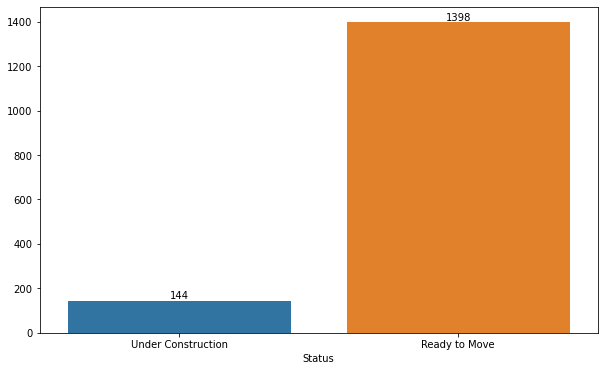

In [283]:
grp = df1['Status'].value_counts()
val = df1['Status'].value_counts().values
idx = df1['Status'].value_counts().index
ax = sns.barplot(x = idx, y = val, data = grp, errwidth = 0)
ax.bar_label(ax.containers[0])                              # for making the values over the bars.
ax.set_xticklabels(['Under Construction', 'Ready to Move'])

#### 2. Which Society covers the more number of properties.

In [198]:
soc = df1['Society_name'].value_counts().sort_values(ascending = False)[1:].head(10)
soc

TARC Tripundra                17
DLF Capital Greens 1 and 2    15
Unity the Amaryllis           13
DDA Flats Munirka             13
DLF One Midtown               12
Godrej Connaught One           8
DDA Flats Vasant Kunj          8
Dream Apartments               7
Godrej South Estate            7
Guru Apartment                 6
Name: Society_name, dtype: int64

[Text(0, 0, '17'),
 Text(0, 0, '15'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '6')]

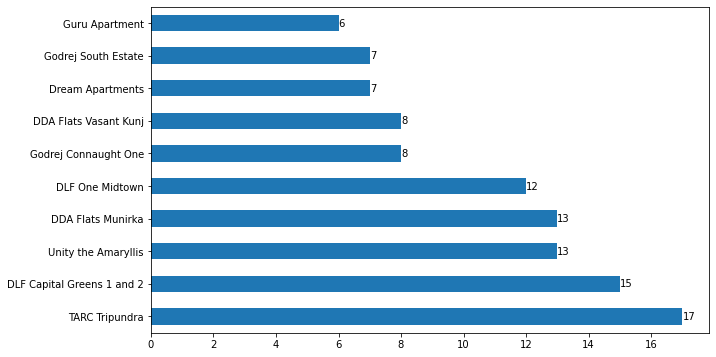

In [286]:
s1 = soc.plot(kind = 'barh')
plt.bar_label(s1.containers[0])

#### 3. Total no. of furnished, non-furnished and semi-furnished Properties.

In [207]:
df1.groupby(['Furnishing'])['P_ID'].count()

Furnishing
Furnished         210
Semi-Furnished    940
Unfurnished       392
Name: P_ID, dtype: int64

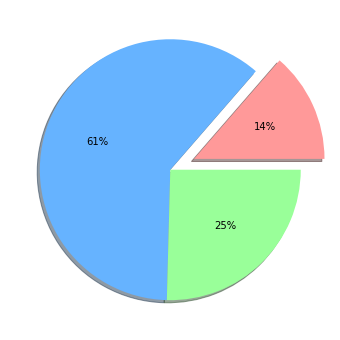

In [231]:
a = df1.groupby(['Furnishing'])['P_ID'].count()
exd = (0.2, 0, 0) 
colors = ['#ff9999','#66b3ff','#99ff99']
#create pie chart
plt.pie(a, autopct='%.0f%%', shadow = True, explode = exd, colors = colors)
plt.show()

#### 4. No. BHK the property contains and their number.

In [269]:
bhk = df1['BHK'].value_counts().head(5)

[Text(0, 0, '749'),
 Text(0, 0, '355'),
 Text(0, 0, '319'),
 Text(0, 0, '85'),
 Text(0, 0, '20')]

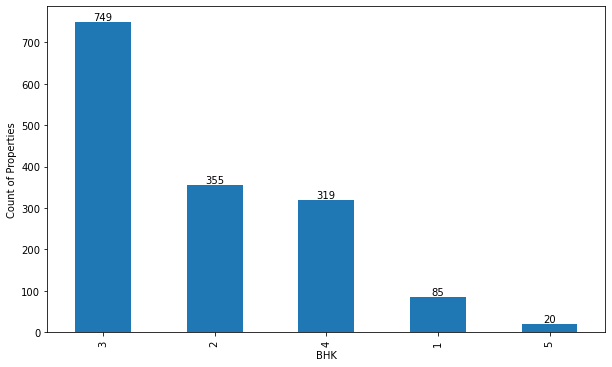

In [285]:
hr = bhk.plot(kind = 'bar')
plt.xlabel('BHK')
plt.ylabel('Count of Properties')
plt.bar_label(hr.containers[0])

#### 5. Costliest Property.

In [327]:
df1.sort_values(by = 'Price', ascending = False).head(1)

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
88,P_89,Ideal Property Solutions,349900000,5,New Property,0,East,Semi-Furnished,Freehold,Shanti Niketan,5.0,3.0,Under Construction,NaN,2500.0,NaN,"Shanti Niketan, Moti Bagh",https://www.magicbricks.com/shanti-niketan-mot...,4500,76901,5Bedrooms Flat Available for sale Plot area100...


#### 6. Low Price property.

In [328]:
df1.sort_values(by = 'Price', ascending = True).head(1)

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
634,P_635,Private property,1150000,1,Resale,1,East,Semi-Furnished,Freehold,New Delhi,1.0,1.0,Ready to Move,NaN,NaN,Sunanda Jogi,Budh Vihar,NaN,500,2300,This property is so Good and there are more an...


#### 7. Properties that contains max price sqr per feet.

In [329]:
df1.sort_values(by = 'Price_per_sqr_feet', ascending = False).head(1)

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
521,P_522,Private property,82500000,5,Resale,4,East,Semi-Furnished,Freehold,New Delhi,5.0,1.0,Ready to Move,NaN,NaN,Vedansh Aggarwal,Punjabi Bagh West,NaN,525,157143,Builder floor apartment is available for sale....


#### 8. Properties that contains min price sqr per feet.

In [330]:
df1.sort_values(by = 'Price_per_sqr_feet', ascending = True).head(1)

,P_ID,Property_name,Price,BHK,Transaction_type,Floor,Facing_Direction,Furnishing,Ownership,Society_name,Bathrooms,Car_Parking,Status,Agent_name,Buyers_from_agents,Owner_name,Address,Product_link,Area_in_sqr_feet,Price_per_sqr_feet,Reviews
634,P_635,Private property,1150000,1,Resale,1,East,Semi-Furnished,Freehold,New Delhi,1.0,1.0,Ready to Move,NaN,NaN,Sunanda Jogi,Budh Vihar,NaN,500,2300,This property is so Good and there are more an...


#### 9. Most of the Properties are faced towards.

In [360]:
df1['Facing_Direction'].value_counts()

East            658
North - East    409
North           221
North - West     81
South - East     53
South            49
West             37
South -West      34
Name: Facing_Direction, dtype: int64

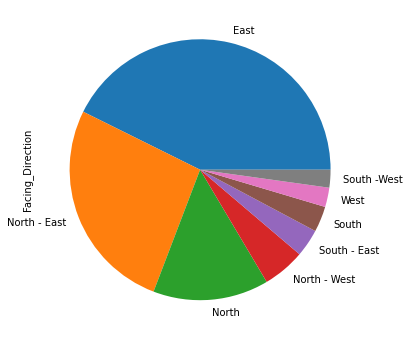

In [367]:
fd = df1['Facing_Direction'].value_counts().plot(kind = 'pie')

#### 10. More number of properties located in which floor ?

In [372]:
df1['Floor'].value_counts().sort_values(ascending = False).head(3)

1    474
2    345
3    267
Name: Floor, dtype: int64

## Sentimental Analysis:

In [249]:
reviews = df1['Reviews']
p_id = 0
for review in reviews:
    blob = tb(review)
    p_id += 1
    print(f'{p_id} : \n {review} \n\n {blob.sentiment} \n\n\n')
    

1 : 
 Farm Side Apartments are Luxury Builder Floors located in Chhattarpur near Metro Station at affordable prices with all modern amenities.3 Side Open Building with Cross VentilationInterior design of every room is based on principle of VastuIn proximity to spas, fitness centers , hospitals, banks, metro stations and supermarketsOffering 1 BHK, 2 BHK & 3 BHK. Perfect blend of natural beauty and lavish amenities and just a few walks away from all the comfortable lifestyles such as spas, fitness centers, hospitals, banks, metro stations, supermarkets, etc.Project offers you a top-quality living at a very reasonable price. Vaastu Compliant, 3 sides Open Building with cross ventilation. Flat is very spacious and gets ample light. Interior design of every room is based on principle of VastuThe flat has 24x7 Electricity & Water Supply. 

 Sentiment(polarity=0.14764705882352944, subjectivity=0.38411764705882356) 



2 : 
 Build Wick Realty provides you Luxury Builder Floors Build Wick Corn


126 : 
 3 BHK builder floor available for sale in govindpuri main. property is newely constructed and possession in one month. property is well equipped with all kind of modern fittings and fixtures. 

 Sentiment(polarity=0.3416666666666666, subjectivity=0.48333333333333334) 



127 : 
 4 BHK, Multistorey Apartment is available for Sale in Dwarka Sector 6, New Delhi for 2.9 Crore(s) 

 Sentiment(polarity=0.2681818181818182, subjectivity=0.42727272727272725) 



128 : 
 Super Luxury Apartments in Signature Residences at the Heart of Central Delhi situated at Shaheed Bhagat Singh Marg, Connaught Place, New Delhi. Godrej Connaught One offers you ultra luxury 3  4 BHK apartments in Connaught Place, Delhi. This project is nothing but the most breathtaking place to live in.The location also offers strategic proximity to hospitals, educational institutions, hotels and recreation centers. Connaught Place has a great infrastructure and has well linked roads, connecting its occupants to differe


200 : 
 South Delhi Builder Floors is One of our most prestigious and popular residential project located in the heart of South Delhi at Greater Kailash, New DelhiThis project offers 3, 4 and 5 BHK Ultra Luxurious Builder Floor Flats for the comfort of residents.It is close to market and many educational institutions in and around Greater Kailash, New Delhi.Our projects are only 2 minutes away from Greater Kailash Metro Station and it is only 30 to 35 minutes away from Noida, Gurugram & Cannaught Place. 

 Sentiment(polarity=0.31022727272727274, subjectivity=0.546590909090909) 



201 : 
 DLF One Midtown, a newly launched residential project offers you ultra-modern yet courteous luxury homes, nestled in the lap of scenery, and neighbouring a staggering 100 acres of lush greens. With 100 acres of greenery, DLF Midtown project is like a breath of fresh air in the concrete jungle. An iconic place set to become the new address for a fantastic luxury lifestyle.DLF One Midtown Delhi - an oc


350 : 
 Free hold Society Flat having 3 bedroom with 2 toiletbath, big drawing and dinning, main road facing, tile flooring, Modular kitchen, POP, false ceiling, Complete wood work, 24 hour water and electricity supplybackup, Well maintain society park, near by market, School and metro, etc. All leading modern and private school market grocery shops mother dairy booth shops all amenities. 

 Sentiment(polarity=0.06018518518518517, subjectivity=0.3814814814814815) 



351 : 
 furnished 

 Sentiment(polarity=0.0, subjectivity=0.0) 



352 : 
 This is a 4BHK and 3 Bathroom semifurnished spacious big flat at Best Paradise Apartment also known as The Bhartiya Apartment situated at a very decent location. This is a good residential society because of the facilities available in this society like lifts, parking , CCTV, security, metro station, petrol pump, hospitals and mall nearby. 

 Sentiment(polarity=0.3819444444444444, subjectivity=0.3986111111111111) 



353 : 
 3 bhk flat is available


451 : 
 This property is so Good and there are more and more amazing features they are providing to the customers 

 Sentiment(polarity=0.575, subjectivity=0.625) 



452 : 
 This property is so Good and there are more and more amazing features they are providing to the customers 

 Sentiment(polarity=0.575, subjectivity=0.625) 



453 : 
 This property is so Good and there are more and more amazing features they are providing to the customers 

 Sentiment(polarity=0.575, subjectivity=0.625) 



454 : 
 Builder floor apartment is available for sale. It is a good location property. It is a corner property. Please contact for more details. 

 Sentiment(polarity=0.5333333333333333, subjectivity=0.5) 



455 : 
 Available for sale is a 2BHK builder floor which is designed to carry the air of freshness and offer you all the comforts of modern life. Dwelled in Dwarka Sector 19B, New Delhi is your perfect abode with all the daily conveniences located in proximity. Marked by the supreme quali

529 : 
 Generously designed, this 2 BHK builder floor nestled in Saraswati Garden, New Delhi is worth investing, if you are looking for a semi-furnished abode in a prime location with proximity to all the key facilities.Property SpecificationsPerfectly positioned on the 2nd floor, this property with a super area of 110 sq yrds and carpet area of 98 sq yrds is crafted as per Vaastu rules to ensure prosperity. Open from 2 sides, this north-east facing abode is abundantly blessed with fresh air and sunlight, thus promising a pleasant ambience. Comprising 2 bedrooms, living cum dining room, modular kitchen with piped gas connection, 2 bathrooms and 2 balconies, this abode is completely ready to move in with your loved ones. Both the bedrooms are decked up with wardrobes providing sufficient storage space. Among the two western style bathrooms, one is attached to the bedroom whereas the other one is common. In addition, geysers are available in both these bathrooms for 24x7 hot water supply

585 : 
 Benefited with freehold ownership rights, this 3 BHK builder floor is up for sale. Located in New Friends Colony, New Delhi, this builder floor is absolutely ready to move and is relatively new with a construction age of 5 to 10 years. :::: ::Property Specifications :::: ::Facing the south east direction, this vaastu compliant built floor spreads across a huge super area of 6200 sq ft. Advantageously positioned on the ground floor, this property is fully furnished and is the best option for a valuable investment. :::: ::Further, this builder floor consists of 3 bedrooms, 5 bathrooms, 3 well aligned balconies,  a living area, dining area, a puja room and a modular kitchen with chimney, piped gas connection and an attached utility area. :::: ::The bedrooms are furnished with wardrobes and beds whereas the entire builder floor is equipped with 8 air conditioners providing utmost comfort to the residents. Designed in western manner, of the 5 bathrooms, 3 are attached and the other 


765 : 
 The site address of Tarc Tripundra is Tarc Tripundra, Main Bijwasan Road, Pushpanjali Farms, New Delhi, India.. 

 Sentiment(polarity=0.1515151515151515, subjectivity=0.3939393939393939) 



766 : 
 3 BHK builder floor available for sale in govindpuri main. property is newely constructed and possession in one month. property is well equipped with all kind of modern fittings and fixtures. 

 Sentiment(polarity=0.3416666666666666, subjectivity=0.48333333333333334) 



767 : 
 4 BHK, Multistorey Apartment is available for Sale in Dwarka Sector 6, New Delhi for 2.9 Crore(s) 

 Sentiment(polarity=0.2681818181818182, subjectivity=0.42727272727272725) 



768 : 
 Super Luxury Apartments in Signature Residences at the Heart of Central Delhi situated at Shaheed Bhagat Singh Marg, Connaught Place, New Delhi. Godrej Connaught One offers you ultra luxury 3  4 BHK apartments in Connaught Place, Delhi. This project is nothing but the most breathtaking place to live in.The location also offe


862 : 
 NEWLY BUILT BUILDER FLAT FOR SALE IN GREEN PARK.4BHK, ON FIRST FLOOR AND GROUND FLOOR, 3 CAR PARKING'S INSIDE,   470 sqyds PLOT, ALL THE MODERN FACILITIES ARE AVAILABLE. ON MAIN ROAD, WORLD CLASS CONSTRUCTION, ALL THE MODERN AMENITIES, NEAR GREEN PARK METRO. 

 Sentiment(polarity=0.10280303030303031, subjectivity=0.3246212121212121) 



863 : 
 Property is well connected with roads, Public convience is available towards roads and metro. Electricity and water supply. Near by Developed park. 

 Sentiment(polarity=0.15, subjectivity=0.2916666666666667) 



864 : 
 Godrej South Estate at Okhla, New Delhi, offers amazing luxury.. Soon to stand as one of the tallest residential towers in South Delhi, this development is centrally located with easy connectivity to the rest of the city and comes with luxury lifestyle amenities. With a gleaming copper crown atop its head, every element that’s used to build this landmark has a rich legacy to it. The stone cladded entrance lobbies for in


971 : 
 This is a 6 BHK flat for sale in Namdeo G Dhoke Vasant Kunj sector BNew Delhi . 

 Sentiment(polarity=-0.025, subjectivity=0.125) 



972 : 
 Beautifully crafted, this 3 BHK builder floor apartment is available for sale located in one of the prime areas of Rajpur Khurd Extension, New Delhi. :::: ::Property Specifications:: :: ::Occupying a carpet area of 1800 sqft, this semi-furnished apartment is located on the 3rd floor in a 4 storeyed building. This apartment is brilliantly constructed as per the vaastu principles and faces the south-east direction. The floor plan includes 3 well-designed bedrooms, spacious living room, dining room, modular kitchen, puja room, 2 balconies and 3 chic bathrooms. Also, this apartment is furnished with modern wardrobes and AC.:: :: ::The balconies of this apartment are well-aligned and a perfect place to spend some free time enjoying the fresh air. Overlooking the colony and road, one balcony is commonly attached to the 2 bedrooms and the other


1038 : 
 Designed to provide an ultimate level of comfort and convenience, this 2BHK flat is up for sale in Nangal Raya, New Delhi. A friendly neighbourhood and proximity to all the key facilities make this property worth considering to live with your family members.Property SpecificationsSpread across a super area of 820 sqft  a carpet area of 704 sqft, this flat is comfortably positioned on the topmost floor of a 4-storeyed building. Facing the promising north direction, this Vaastu-friendly abode is filled with an abundance of fresh breeze and sunlight, thus promising a warm and pleasant ambiance.Comprising a living cum dining area, a kitchen, 2 bedrooms, 2 bathrooms and 2 balconies, this flat is completely ready to move in with your family members. The property is semi-furnished and comes with a freehold type of ownership.Furthermore, the balconies are individually connected to 2 bedrooms. Both these balconies offer a clear view of the park. The modular kitchen is smartly designed


1090 : 
 This builder floor is at very prime location just 100 mts from main Najafgarh road, near Nawada metro station.Gated block  a very prime location of Mohan Garden, Uttam Nagar  overlooks 30 ft wide road offering a beautiful view from the house, with airy interiors.Prime facilities like market, clinic, schools, hospital etc. Fully modular kitchen with chimney, texture paint and false ceiling in complete floor. Complete wooden work24x7 water  electricityAn independent personal spacious covered car parking with separate gateCeiling fans, fancy lights, led lights, SS railing etc. 

 Sentiment(polarity=0.1013888888888889, subjectivity=0.37986111111111115) 



1091 : 
 2 BHK With Study Room 

 Sentiment(polarity=0.0, subjectivity=0.0) 



1092 : 
 2 bhk. 

 Sentiment(polarity=0.0, subjectivity=0.0) 



1093 : 
 This Freehold Builder Floor Apartment is located at 4th floor in a building of total 4 floors. The age of construction for this apartment Builder Floor Apartment is Less than 

1135 : 
 Nestled very close to the Ealmari Factory, a meticulously designed 3 BHK Builder Floor with 100 Vastu-Shastra floor plans, sun-kissed rooms, and many more facilities are available right at your doorstep. Available for sale in New Delhi, this East facing property serving an ideal location for you and your family members is worth investing in. Property SpecificationsDesigned on the super carpet area of 100 sq ft, this lavish builder floor with a spectacular floor plan is settled on the upper ground floor of a 4-story apartment. Featuring well-ventilated rooms, this semi-furnished flat incorporates 3 spacious bedrooms with wardrobes where you can organise your belongings. Furthermore, 2 western fashion bathrooms have geyser points, where one bathroom is attached to the bedroom while the other is available for common use. This builder floor also has a living cum dining area, a puja temple, and also a utility area that is attached to the kitchen. Furthermore, there is one airy balc


1251 : 
 newly constructed 

 Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453) 



1252 : 
 Excellent  location 

 Sentiment(polarity=1.0, subjectivity=1.0) 



1253 : 
 3BHK A well maintained  corner flat Furnished available for sale. Nearby location like School Bank matro and excellent market area surround them. 

 Sentiment(polarity=0.4583333333333333, subjectivity=0.5083333333333333) 



1254 : 
 Greater Kailash Part 1 Corner Brand New Luxurious Second Floor for sale in 300 Sq. Yards having 4 Bedrooms 4 attached Bathrooms Drawing Dining, Family Lounge, Fully Air Conditioned, All Italian Marble Flooring, Modular Kitchen, Lift, One Servant Room and Two Reserved Car Parking in stilt with independent gate. Excellent Location, Rich Specifications, Immediate for sale. 

 Sentiment(polarity=0.28733766233766234, subjectivity=0.4042207792207792) 



1255 : 
 2bhk. 

 Sentiment(polarity=0.0, subjectivity=0.0) 



1256 : 
 this is a park and sun facing Corner flat 



1393 : 
 Brand new builder floor 300 gaz in south extension 2,its on ground floor with lift and 2 car parking in stilt area,its 4 bhk with attached bathroom drawing area with modular kitchen, 

 Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453) 



1394 : 
 Very Near To Azadpur Metro Statio 

 Sentiment(polarity=0.13, subjectivity=0.52) 



1395 : 
 An Independent Builder Floor Available For Sale in Prime Location of Greater Kailash 1, Third Floor with Terrace, Plot Area 300 Sqyds, 4 Bedrooms attached Bathrooms, Drawing  Dining Area, Modular Kitchen with Excellent Wooden Work, Italian Marble Flooring, Servant Quarter, Lift, Separate Gate Car Parking, Wide Road, Nice Location. For more details99102 34752 99100 34752 

 Sentiment(polarity=0.29, subjectivity=0.39249999999999996) 



1396 : 
 5 BHK, Builder Floor Apartment For Sale in Navjivan Vihar, New Delhi 

 Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453) 



1397 : 
 This property is 


1508 : 
 DDA Mayur Dhwaj Apartment in Patparganj, New Delhi is a marvellously crafted residential project that is known to conceptualise contemporary style homes. Set in this project is a tastefully crafted 2BHK flat of 1050 sqft super area that is open to investment options.  Property Specifications and FacilitiesPlaced on the 5th floor of a 7-storey building, this apartment is showered with natural light and ventilation. With west-facing, this vaastu compliant apartment promotes a pleasant and positive living environment. Fully furnished, this condo comes with 2 bedrooms, 2 bathrooms, 1 balcony, 1 living cum dining area, 1 pooja space and 1 modular kitchen. A glossy and sparkling floor with vitrified tiles reflects much more brightness, at the same time, they absorb less water and are stain-resistant. In both the bedrooms, there are wardrobes, ACs and beds available. Out of 2 bathrooms, 1 is western which is attached and 1 is Indian that is common, also there are geyser facilities a